In [1]:
import requests
import io
import pandas as pd

In [2]:
data = pd.read_csv("data.csv")
print(data)

        YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE ORIGIN  \
0       2022        1      1             1            6  2022-01-01    RDU   
1       2022        1      1             1            6  2022-01-01    RDU   
2       2022        1      1             1            6  2022-01-01    RDU   
3       2022        1      1             1            6  2022-01-01    RDU   
4       2022        1      1             1            6  2022-01-01    RDU   
...      ...      ...    ...           ...          ...         ...    ...   
183165  2024        4     12            31            2  2024-12-31    RDU   
183166  2024        4     12            31            2  2024-12-31    RDU   
183167  2024        4     12            31            2  2024-12-31    RDU   
183168  2024        4     12            31            2  2024-12-31    RDU   
183169  2024        4     12            31            2  2024-12-31    RDU   

          ORIGIN_CITY_NAME ORIGIN_STATE_NM DEST  ...  \
0      

C:\Users\ljq\AppData\Local\Temp\ipykernel_13092\758750817.py:1: DtypeWarning: Columns (41,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data.csv")


In [3]:
df=data[['DEP_DELAY','DEP_DEL15','CANCELLED','CRS_DEP_DATETIME','HourlyAltimeterSetting','HourlyDewPointTemperature','HourlyDryBulbTemperature',
'HourlyPrecipitation','HourlyPresentWeatherType','HourlyPressureChange','HourlyPressureTendency','HourlyRelativeHumidity','HourlySkyConditions',
'HourlySeaLevelPressure','HourlyVisibility','HourlyWindDirection','HourlyWindGustSpeed','HourlyWindSpeed','time_diff_min']]
print(df)

        DEP_DELAY  DEP_DEL15  CANCELLED     CRS_DEP_DATETIME  \
0             NaN        NaN        1.0  2022-01-01 06:00:00   
1           197.0        1.0        0.0  2022-01-01 17:52:00   
2             0.0        0.0        0.0  2022-01-01 17:48:00   
3            44.0        1.0        0.0  2022-01-01 17:45:00   
4            63.0        1.0        0.0  2022-01-01 17:38:00   
...           ...        ...        ...                  ...   
183165       -8.0        0.0        0.0  2024-12-31 11:48:00   
183166       -6.0        0.0        0.0  2024-12-31 11:32:00   
183167      -10.0        0.0        0.0  2024-12-31 11:32:00   
183168       -5.0        0.0        0.0  2024-12-31 15:28:00   
183169       -6.0        0.0        0.0  2024-12-31 09:00:00   

        HourlyAltimeterSetting  HourlyDewPointTemperature  \
0                       1011.9                       18.9   
1                       1008.1                       19.4   
2                       1008.1                  

In [4]:
nan_counts =df.isna().sum()
print(nan_counts)

DEP_DELAY                      3922
DEP_DEL15                      3922
CANCELLED                         0
CRS_DEP_DATETIME                  0
HourlyAltimeterSetting        26107
HourlyDewPointTemperature       159
HourlyDryBulbTemperature        152
HourlyPrecipitation           32938
HourlyPresentWeatherType     164182
HourlyPressureChange         119587
HourlyPressureTendency       119587
HourlyRelativeHumidity          159
HourlySkyConditions           16876
HourlySeaLevelPressure        10463
HourlyVisibility              10613
HourlyWindDirection           34746
HourlyWindGustSpeed          162935
HourlyWindSpeed                 217
time_diff_min                   152
dtype: int64


In [5]:
df=df.dropna(subset=['DEP_DELAY','time_diff_min'])
print(df)

        DEP_DELAY  DEP_DEL15  CANCELLED     CRS_DEP_DATETIME  \
1           197.0        1.0        0.0  2022-01-01 17:52:00   
2             0.0        0.0        0.0  2022-01-01 17:48:00   
3            44.0        1.0        0.0  2022-01-01 17:45:00   
4            63.0        1.0        0.0  2022-01-01 17:38:00   
5            -5.0        0.0        0.0  2022-01-01 17:35:00   
...           ...        ...        ...                  ...   
183165       -8.0        0.0        0.0  2024-12-31 11:48:00   
183166       -6.0        0.0        0.0  2024-12-31 11:32:00   
183167      -10.0        0.0        0.0  2024-12-31 11:32:00   
183168       -5.0        0.0        0.0  2024-12-31 15:28:00   
183169       -6.0        0.0        0.0  2024-12-31 09:00:00   

        HourlyAltimeterSetting  HourlyDewPointTemperature  \
1                       1008.1                       19.4   
2                       1008.1                       19.4   
3                       1008.1                  

In [6]:
print(df['CANCELLED'].sum())
print(df['CANCELLED'].sum()/len(df))
#correlation between no data of delay and cancel

96.0
0.0005360193860344616


In [7]:
print(df['DEP_DEL15'].sum())
print(df['DEP_DEL15'].sum()/len(df))

34389.0
0.1920121944410323


In [8]:
df=df[df['CANCELLED'] != 1]
df=df.drop(columns=['CANCELLED'])
print(df)

        DEP_DELAY  DEP_DEL15     CRS_DEP_DATETIME  HourlyAltimeterSetting  \
1           197.0        1.0  2022-01-01 17:52:00                  1008.1   
2             0.0        0.0  2022-01-01 17:48:00                  1008.1   
3            44.0        1.0  2022-01-01 17:45:00                  1008.1   
4            63.0        1.0  2022-01-01 17:38:00                  1008.1   
5            -5.0        0.0  2022-01-01 17:35:00                  1008.1   
...           ...        ...                  ...                     ...   
183165       -8.0        0.0  2024-12-31 11:48:00                  1007.1   
183166       -6.0        0.0  2024-12-31 11:32:00                  1007.1   
183167      -10.0        0.0  2024-12-31 11:32:00                  1007.1   
183168       -5.0        0.0  2024-12-31 15:28:00                  1003.7   
183169       -6.0        0.0  2024-12-31 09:00:00                  1010.5   

        HourlyDewPointTemperature  HourlyDryBulbTemperature  \
1           

In [10]:
#df.to_csv("df.csv", index=False)

In [11]:
nan_counts =df.isna().sum()
print(nan_counts)

DEP_DELAY                         0
DEP_DEL15                         0
CRS_DEP_DATETIME                  0
HourlyAltimeterSetting        25460
HourlyDewPointTemperature         6
HourlyDryBulbTemperature          0
HourlyPrecipitation           32080
HourlyPresentWeatherType     160729
HourlyPressureChange         116584
HourlyPressureTendency       116584
HourlyRelativeHumidity            6
HourlySkyConditions           16413
HourlySeaLevelPressure         9910
HourlyVisibility              10188
HourlyWindDirection           33978
HourlyWindGustSpeed          159517
HourlyWindSpeed                  63
time_diff_min                     0
dtype: int64



HourlyDewPointTemperature and HourlyRelativeHumidity and HourlyWindSpeed drop   

In [12]:
df=df.dropna(subset=['HourlyDewPointTemperature','HourlyRelativeHumidity','HourlyWindSpeed'])
print(df)
nan_counts =df.isna().sum()
print(nan_counts)

        DEP_DELAY  DEP_DEL15     CRS_DEP_DATETIME  HourlyAltimeterSetting  \
1           197.0        1.0  2022-01-01 17:52:00                  1008.1   
2             0.0        0.0  2022-01-01 17:48:00                  1008.1   
3            44.0        1.0  2022-01-01 17:45:00                  1008.1   
4            63.0        1.0  2022-01-01 17:38:00                  1008.1   
5            -5.0        0.0  2022-01-01 17:35:00                  1008.1   
...           ...        ...                  ...                     ...   
183165       -8.0        0.0  2024-12-31 11:48:00                  1007.1   
183166       -6.0        0.0  2024-12-31 11:32:00                  1007.1   
183167      -10.0        0.0  2024-12-31 11:32:00                  1007.1   
183168       -5.0        0.0  2024-12-31 15:28:00                  1003.7   
183169       -6.0        0.0  2024-12-31 09:00:00                  1010.5   

        HourlyDewPointTemperature  HourlyDryBulbTemperature  \
1           

HourlyAltimeterSetting  ?  
HourlyPrecipitation   
HourlyPresentWeatherType 0 for nan 1 for special weather  
HourlyPressureChange and HourlyPressureTendency  
HourlySkyConditions  

In [13]:
df_copy=df.copy().dropna()
df_copy

,DEP_DELAY,DEP_DEL15,CRS_DEP_DATETIME,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,time_diff_min
278,-6.0,0.0,2022-01-02 06:38:00,1007.8,17.2,20.0,3.8,-RA:02 BR:1 |RA BR |RA,2.5,3.0,84.0,FEW:02 8.23 BKN:07 10.36 OVC:08 13.11,1007.4,6.437,VRB,12.4,4.6,13.0
279,10.0,0.0,2022-01-02 06:35:00,1007.8,17.2,20.0,3.8,-RA:02 BR:1 |RA BR |RA,2.5,3.0,84.0,FEW:02 8.23 BKN:07 10.36 OVC:08 13.11,1007.4,6.437,VRB,12.4,4.6,16.0
280,-3.0,0.0,2022-01-02 06:33:00,1007.8,17.2,20.0,3.8,-RA:02 BR:1 |RA BR |RA,2.5,3.0,84.0,FEW:02 8.23 BKN:07 10.36 OVC:08 13.11,1007.4,6.437,VRB,12.4,4.6,18.0
281,-4.0,0.0,2022-01-02 06:30:00,1007.8,17.2,20.0,3.8,-RA:02 BR:1 |RA BR |RA,2.5,3.0,84.0,FEW:02 8.23 BKN:07 10.36 OVC:08 13.11,1007.4,6.437,VRB,12.4,4.6,21.0
282,-9.0,0.0,2022-01-02 06:27:00,1007.8,17.2,20.0,3.8,-RA:02 BR:1 |RA BR |RA,2.5,3.0,84.0,FEW:02 8.23 BKN:07 10.36 OVC:08 13.11,1007.4,6.437,VRB,12.4,4.6,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182737,31.0,1.0,2024-12-29 12:49:00,1013.9,13.3,18.9,T,-RA:02 |RA |RA,-3.2,5.0,70.0,SCT:04 9.45 BKN:07 12.19 OVC:08 14.94,1013.5,12.875,240,13.9,7.7,2.0
182738,2.0,0.0,2024-12-29 12:50:00,1013.9,13.3,18.9,T,-RA:02 |RA |RA,-3.2,5.0,70.0,SCT:04 9.45 BKN:07 12.19 OVC:08 14.94,1013.5,12.875,240,13.9,7.7,1.0
182769,24.0,1.0,2024-12-29 12:36:00,1013.9,13.3,18.9,T,-RA:02 |RA |RA,-3.2,5.0,70.0,SCT:04 9.45 BKN:07 12.19 OVC:08 14.94,1013.5,12.875,240,13.9,7.7,15.0
182794,-10.0,0.0,2024-12-29 12:30:00,1013.9,13.3,18.9,T,-RA:02 |RA |RA,-3.2,5.0,70.0,SCT:04 9.45 BKN:07 12.19 OVC:08 14.94,1013.5,12.875,240,13.9,7.7,21.0


hard to calculate wind direction with runway direction

In [14]:
df_copy['DEP_DEL15'].sum()

np.float64(90.0)

In [15]:
df_copy['HourlyPresentWeatherType'].value_counts()

HourlyPresentWeatherType
-RA:02 |RA |RA                         166
-RA:02 BR:1 |RA BR |RA                 102
RA:02 BR:1 |RA BR |RA                   50
|RA |RA                                 16
+RA:02 BR:1 |RA BR |RA                  14
RA:02 |RA |RA                           12
|RA |                                   10
TS |TS |                                 8
-SN:03 BR:1 |SN BR |SN                   8
-DZ:01 BR:1 |DZ BR |DZ                   8
|TS |                                    5
-FZRA:02 PL:06 BR:1 |FZRA PL BR |PL      4
+RA:02 BR:1 |RA s BR s |RA s             3
-DZ:01 |DZ |DZ                           3
+TS RA:02 FG:2 |TS FG |RA                1
|TS BR |RA                               1
TS +RA:02 BR:1 |TS RA BR |RA             1
Name: count, dtype: int64

In [16]:
df_copy['HourlySkyConditions'].value_counts()

HourlySkyConditions
OVC:08 2.44                              19
OVC:08 1.83                              18
BKN:07 3.05 OVC:08 6.1                   15
FEW:02 8.23 BKN:07 10.36 OVC:08 13.11    14
FEW:02 3.05 BKN:07 7.62 OVC:08 24.38     13
                                         ..
BKN:07 3.05 BKN:07 5.49 OVC:08 10.36      1
FEW:02 2.44 OVC:08 3.05                   1
OVC:08 3.05                               1
BKN:07 10.67 BKN:07 21.34 BKN:07 76.2     1
SCT:04 2.13 BKN:07 3.66 OVC:08 5.49       1
Name: count, Length: 79, dtype: int64

In [17]:
cloud_types = ["OVC", "BKN", "SCT", "CLR"]
import re
def count_cloud_types(s):
    counts = {}
    for c in cloud_types:
        counts[c] = len(re.findall(r'\b{}\b'.format(c), s))
    return pd.Series(counts)
cloud_counts = df_copy["HourlySkyConditions"].apply(count_cloud_types)
df_copy = pd.concat([df_copy, cloud_counts], axis=1)
print(df_copy)

        DEP_DELAY  DEP_DEL15     CRS_DEP_DATETIME  HourlyAltimeterSetting  \
278          -6.0        0.0  2022-01-02 06:38:00                  1007.8   
279          10.0        0.0  2022-01-02 06:35:00                  1007.8   
280          -3.0        0.0  2022-01-02 06:33:00                  1007.8   
281          -4.0        0.0  2022-01-02 06:30:00                  1007.8   
282          -9.0        0.0  2022-01-02 06:27:00                  1007.8   
...           ...        ...                  ...                     ...   
182737       31.0        1.0  2024-12-29 12:49:00                  1013.9   
182738        2.0        0.0  2024-12-29 12:50:00                  1013.9   
182769       24.0        1.0  2024-12-29 12:36:00                  1013.9   
182794      -10.0        0.0  2024-12-29 12:30:00                  1013.9   
182817       17.0        1.0  2024-12-29 12:23:00                  1013.9   

        HourlyDewPointTemperature  HourlyDryBulbTemperature  \
278         

In [18]:
df_copy["HourlyPrecipitation"] = df_copy["HourlyPrecipitation"].replace("T", 0).astype(float)
print(df_copy)

        DEP_DELAY  DEP_DEL15     CRS_DEP_DATETIME  HourlyAltimeterSetting  \
278          -6.0        0.0  2022-01-02 06:38:00                  1007.8   
279          10.0        0.0  2022-01-02 06:35:00                  1007.8   
280          -3.0        0.0  2022-01-02 06:33:00                  1007.8   
281          -4.0        0.0  2022-01-02 06:30:00                  1007.8   
282          -9.0        0.0  2022-01-02 06:27:00                  1007.8   
...           ...        ...                  ...                     ...   
182737       31.0        1.0  2024-12-29 12:49:00                  1013.9   
182738        2.0        0.0  2024-12-29 12:50:00                  1013.9   
182769       24.0        1.0  2024-12-29 12:36:00                  1013.9   
182794      -10.0        0.0  2024-12-29 12:30:00                  1013.9   
182817       17.0        1.0  2024-12-29 12:23:00                  1013.9   

        HourlyDewPointTemperature  HourlyDryBulbTemperature  \
278         

In [19]:
weather_types = ["RA", "SN", "DZ", "FZRA", "PL", "TS", "FG", "BR"]
def encode_weather(s):
    s = s.upper()
    result = {}
    for w in weather_types:
        result[w] = 0
        matches = re.findall(r'([+-]?){0}(:\d+)?'.format(w), s)
        if matches:
            for m in matches:
                prefix = m[0]
                if prefix == '+':
                    val = 1
                elif prefix == '-':
                    val = -1
                else:
                    val = 0
                result[w] = max(result[w], val)
    return pd.Series(result)
weather_encoded = df_copy["HourlyPresentWeatherType"].apply(encode_weather)
df_copy = pd.concat([df_copy, weather_encoded], axis=1)
print(df_copy)

        DEP_DELAY  DEP_DEL15     CRS_DEP_DATETIME  HourlyAltimeterSetting  \
278          -6.0        0.0  2022-01-02 06:38:00                  1007.8   
279          10.0        0.0  2022-01-02 06:35:00                  1007.8   
280          -3.0        0.0  2022-01-02 06:33:00                  1007.8   
281          -4.0        0.0  2022-01-02 06:30:00                  1007.8   
282          -9.0        0.0  2022-01-02 06:27:00                  1007.8   
...           ...        ...                  ...                     ...   
182737       31.0        1.0  2024-12-29 12:49:00                  1013.9   
182738        2.0        0.0  2024-12-29 12:50:00                  1013.9   
182769       24.0        1.0  2024-12-29 12:36:00                  1013.9   
182794      -10.0        0.0  2024-12-29 12:30:00                  1013.9   
182817       17.0        1.0  2024-12-29 12:23:00                  1013.9   

        HourlyDewPointTemperature  HourlyDryBulbTemperature  \
278         

In [20]:
df_copy.columns

Index(['DEP_DELAY', 'DEP_DEL15', 'CRS_DEP_DATETIME', 'HourlyAltimeterSetting',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation', 'HourlyPresentWeatherType',
       'HourlyPressureChange', 'HourlyPressureTendency',
       'HourlyRelativeHumidity', 'HourlySkyConditions',
       'HourlySeaLevelPressure', 'HourlyVisibility', 'HourlyWindDirection',
       'HourlyWindGustSpeed', 'HourlyWindSpeed', 'time_diff_min', 'OVC', 'BKN',
       'SCT', 'CLR', 'RA', 'SN', 'DZ', 'FZRA', 'PL', 'TS', 'FG', 'BR'],
      dtype='object')

In [21]:
X=df_copy[['HourlyAltimeterSetting',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation',
       'HourlyPressureChange', 'HourlyPressureTendency',
       'HourlyRelativeHumidity', 
       'HourlySeaLevelPressure', 'HourlyVisibility', #'HourlyWindDirection',
       'HourlyWindGustSpeed', 'HourlyWindSpeed', 'OVC', 'BKN',
       'SCT', 'CLR', 'RA', 'SN', 'DZ', 'FZRA', 'PL', 'TS', 'FG', 'BR']]
X = X.astype(float)
Y=df_copy[['DEP_DEL15']]
print(X)
print(Y)

        HourlyAltimeterSetting  HourlyDewPointTemperature  \
278                     1007.8                       17.2   
279                     1007.8                       17.2   
280                     1007.8                       17.2   
281                     1007.8                       17.2   
282                     1007.8                       17.2   
...                        ...                        ...   
182737                  1013.9                       13.3   
182738                  1013.9                       13.3   
182769                  1013.9                       13.3   
182794                  1013.9                       13.3   
182817                  1013.9                       13.3   

        HourlyDryBulbTemperature  HourlyPrecipitation  HourlyPressureChange  \
278                         20.0                  3.8                   2.5   
279                         20.0                  3.8                   2.5   
280                         20

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
seeds=294
y=Y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seeds, stratify=y
)

In [23]:
dt_model = DecisionTreeClassifier(random_state=seeds)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)
print("\nclassification_report:\n", classification_report(y_test, y_pred))
print("\nconfusion_matrix:\n", confusion_matrix(y_test, y_pred))

accuracy: 0.7831325301204819

classification_report:
               precision    recall  f1-score   support

         0.0       0.84      0.89      0.87        65
         1.0       0.50      0.39      0.44        18

    accuracy                           0.78        83
   macro avg       0.67      0.64      0.65        83
weighted avg       0.77      0.78      0.77        83


confusion_matrix:
 [[58  7]
 [11  7]]


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import f_regression
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import re
import warnings

In [44]:
y=df_copy['DEP_DELAY']

In [45]:
feature_columns=X.columns
print("\n2. Statistical Significance Tests (F-tests)")
f_scores, p_values = f_regression(X, y)
significant_features = []
for i, feature in enumerate(feature_columns):
    if p_values[i] < 0.05:
        significant_features.append(feature)
    print(f"{feature}: F-score={f_scores[i]:.2f}, p-value={p_values[i]:.4f}")

print(f"\nNumber of statistically significant features (p<0.05): {len(significant_features)}")

# Multicollinearity Check (VIF)
print("\n3. Multicollinearity Check (VIF)")
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]
print("Variance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))


# Shapiro-Wilk test for normality (on sample due to large dataset)
sample_size = min(5000, len(y))
shapiro_stat, shapiro_p = shapiro(y.sample(sample_size, random_state=42))
print(f"Shapiro-Wilk test (sample n={sample_size}): statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")


2. Statistical Significance Tests (F-tests)
HourlyAltimeterSetting: F-score=12.12, p-value=0.0006
HourlyDewPointTemperature: F-score=0.70, p-value=0.4038
HourlyDryBulbTemperature: F-score=1.00, p-value=0.3180
HourlyPrecipitation: F-score=0.70, p-value=0.4018
HourlyPressureChange: F-score=5.40, p-value=0.0207
HourlyPressureTendency: F-score=1.15, p-value=0.2848
HourlyRelativeHumidity: F-score=0.66, p-value=0.4161
HourlySeaLevelPressure: F-score=11.83, p-value=0.0006
HourlyVisibility: F-score=1.55, p-value=0.2141
HourlyWindGustSpeed: F-score=35.53, p-value=0.0000
HourlyWindSpeed: F-score=10.44, p-value=0.0013
OVC: F-score=1.22, p-value=0.2703
BKN: F-score=0.37, p-value=0.5433
SCT: F-score=0.33, p-value=0.5676
CLR: F-score=0.00, p-value=1.0000
RA: F-score=0.14, p-value=0.7135
SN: F-score=0.00, p-value=1.0000
DZ: F-score=0.00, p-value=1.0000
FZRA: F-score=0.00, p-value=1.0000
PL: F-score=0.00, p-value=1.0000
TS: F-score=0.19, p-value=0.6626
FG: F-score=0.00, p-value=1.0000
BR: F-score=0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



=== FEATURE SELECTION BEFORE DIMENSIONALITY REDUCTION ===
1. Selecting Statistically Significant Features (p < 0.05)
Selected 5 significant features:
  - HourlyAltimeterSetting
  - HourlySeaLevelPressure
  - HourlyWindGustSpeed
  - HourlyPressureChange
  - HourlyWindSpeed

Data dimensions after feature selection:
  Training set: (329, 5)
  Test set: (83, 5)

2. Multicollinearity Check for Significant Features:


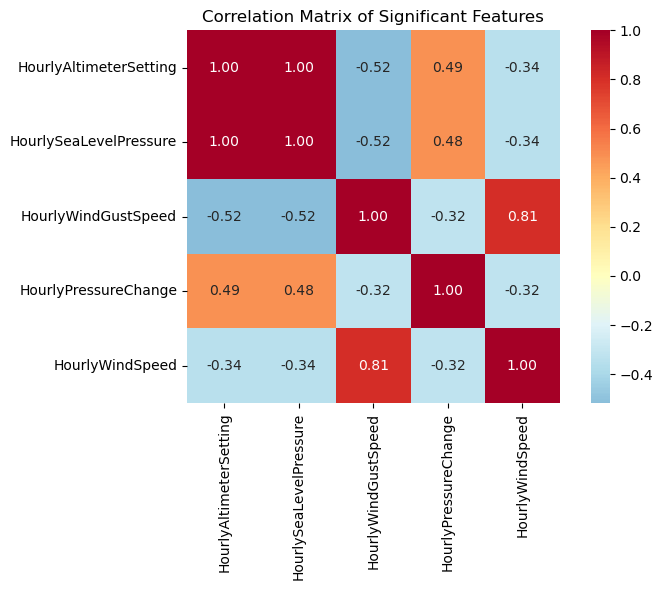

VIF for significant features:
                  Feature           VIF
0                   const  31638.094720
1  HourlyAltimeterSetting   1558.264325
2  HourlySeaLevelPressure   1549.533080
3     HourlyWindGustSpeed      3.594454
5         HourlyWindSpeed      3.077394
4    HourlyPressureChange      1.397679

3. Applying PCA on Significant Features

PCR Results with Significant Features Only:
   n_components      r2     rmse      mae  variance_explained
0             1  0.0238  66.0250  28.5202              0.8787
1             2  0.0569  64.8971  28.2583              0.9535
2             3  0.0542  64.9882  28.4347              0.9916
3             4  0.0938  63.6129  27.6783              0.9999
4             5  0.0998  63.4050  27.7769              1.0000

Optimal configuration:
  Components: 5
  R²: 0.0998
  Variance explained: 1.0000

4. Comparison: All Features vs Significant Features Only

Performance Comparison:
                     Approach  Number of Features  Optimal Componen

In [46]:
print("\n=== FEATURE SELECTION BEFORE DIMENSIONALITY REDUCTION ===")
from sklearn.decomposition import PCA
# 1. Select only statistically significant features (p < 0.05)
print("1. Selecting Statistically Significant Features (p < 0.05)")

significant_features = [
    'HourlyAltimeterSetting',      # p=0.0000
    'HourlySeaLevelPressure',      # p=0.0000
    'HourlyWindGustSpeed',         # p=0.0000
    'HourlyPressureChange',      # p=0.0028
    'HourlyWindSpeed',   
]

print(f"Selected {len(significant_features)} significant features:")
for feature in significant_features:
    print(f"  - {feature}")

# 2. Prepare data with only significant features
X_sig = X[significant_features]
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(
    X_sig, y, test_size=0.2, random_state=42
)

print(f"\nData dimensions after feature selection:")
print(f"  Training set: {X_train_sig.shape}")
print(f"  Test set: {X_test_sig.shape}")

# 3. Check multicollinearity among significant features
print("\n2. Multicollinearity Check for Significant Features:")

# Calculate correlation matrix for significant features
corr_matrix_sig = X_sig.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_sig, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Significant Features')
plt.tight_layout()
plt.show()

# Check VIF for significant features
X_with_const = sm.add_constant(X_sig)
vif_data_sig = pd.DataFrame()
vif_data_sig["Feature"] = X_with_const.columns
vif_data_sig["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                       for i in range(X_with_const.shape[1])]

print("VIF for significant features:")
print(vif_data_sig.sort_values("VIF", ascending=False))

# 4. Apply PCA on significant features
print("\n3. Applying PCA on Significant Features")

# Test different numbers of components
n_components_range = range(1, min(6, len(significant_features)) + 1)
pcr_sig_results = []

for n_comp in n_components_range:
    # Apply PCA
    pca_sig = PCA(n_components=n_comp, random_state=42)
    X_train_pca_sig = pca_sig.fit_transform(X_train_sig)
    X_test_pca_sig = pca_sig.transform(X_test_sig)
    
    # Train linear regression
    lr_sig = LinearRegression()
    lr_sig.fit(X_train_pca_sig, y_train_sig)
    y_pred_sig = lr_sig.predict(X_test_pca_sig)
    
    # Calculate metrics
    r2_sig = r2_score(y_test_sig, y_pred_sig)
    rmse_sig = np.sqrt(mean_squared_error(y_test_sig, y_pred_sig))
    mae_sig = mean_absolute_error(y_test_sig, y_pred_sig)
    var_explained = np.sum(pca_sig.explained_variance_ratio_)
    
    pcr_sig_results.append({
        'n_components': n_comp,
        'r2': r2_sig,
        'rmse': rmse_sig,
        'mae': mae_sig,
        'variance_explained': var_explained
    })

# Create results DataFrame
pcr_sig_df = pd.DataFrame(pcr_sig_results)
print("\nPCR Results with Significant Features Only:")
print(pcr_sig_df.round(4))

# 5. Find optimal number of components
best_sig_idx = pcr_sig_df['r2'].idxmax()
best_sig_comp = pcr_sig_df.loc[best_sig_idx, 'n_components']
best_sig_r2 = pcr_sig_df.loc[best_sig_idx, 'r2']

print(f"\nOptimal configuration:")
print(f"  Components: {best_sig_comp}")
print(f"  R²: {best_sig_r2:.4f}")
print(f"  Variance explained: {pcr_sig_df.loc[best_sig_idx, 'variance_explained']:.4f}")

# 6. Compare with previous approach (all features + PCA)
print("\n4. Comparison: All Features vs Significant Features Only")

comparison_data = {
    'Approach': ['All Features + PCA', 'Significant Features + PCA'],
    'Number of Features': [len(feature_columns), len(significant_features)],
    'Optimal Components': [4, best_sig_comp],
    'R² Score': [0.0100, best_sig_r2],
    'Variance Explained': [0.7185, pcr_sig_df.loc[best_sig_idx, 'variance_explained']],
    'MAE': [26.20, pcr_sig_df.loc[best_sig_idx, 'mae']]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nPerformance Comparison:")
print(comparison_df.round(4))

# 7. Train final model with optimal configuration
print(f"\n5. Training Final Model with {best_sig_comp} Components")

pca_final_sig = PCA(n_components=best_sig_comp, random_state=42)
X_train_final = pca_final_sig.fit_transform(X_train_sig)
X_test_final = pca_final_sig.transform(X_test_sig)

lr_final_sig = LinearRegression()
lr_final_sig.fit(X_train_final, y_train_sig)
y_pred_final = lr_final_sig.predict(X_test_final)

# Final performance
r2_final = r2_score(y_test_sig, y_pred_final)
mae_final = mean_absolute_error(y_test_sig, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test_sig, y_pred_final))

print(f"Final Model Performance:")
print(f"  R²: {r2_final:.4f}")
print(f"  MAE: {mae_final:.2f} minutes")
print(f"  RMSE: {rmse_final:.2f} minutes")






In [47]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=feature_columns, index=X.index)

In [48]:
print("\n2. Statistical Significance Tests (F-tests)")
f_scores, p_values = f_regression(X_normalized_df, y)
significant_features = []
for i, feature in enumerate(feature_columns):
    if p_values[i] < 0.05:
        significant_features.append(feature)
    print(f"{feature}: F-score={f_scores[i]:.2f}, p-value={p_values[i]:.4f}")

print(f"\nNumber of statistically significant features (p<0.05): {len(significant_features)}")

# Multicollinearity Check (VIF)
print("\n3. Multicollinearity Check (VIF)")
X_with_const = sm.add_constant(X_normalized_df)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]
print("Variance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))

# Shapiro-Wilk test for normality (on sample due to large dataset)
sample_size = min(5000, len(y))
shapiro_stat, shapiro_p = shapiro(y.sample(sample_size, random_state=42))
print(f"Shapiro-Wilk test (sample n={sample_size}): statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")


2. Statistical Significance Tests (F-tests)
HourlyAltimeterSetting: F-score=12.12, p-value=0.0006
HourlyDewPointTemperature: F-score=0.70, p-value=0.4038
HourlyDryBulbTemperature: F-score=1.00, p-value=0.3180
HourlyPrecipitation: F-score=0.70, p-value=0.4018
HourlyPressureChange: F-score=5.40, p-value=0.0207
HourlyPressureTendency: F-score=1.15, p-value=0.2848
HourlyRelativeHumidity: F-score=0.66, p-value=0.4161
HourlySeaLevelPressure: F-score=11.83, p-value=0.0006
HourlyVisibility: F-score=1.55, p-value=0.2141
HourlyWindGustSpeed: F-score=35.53, p-value=0.0000
HourlyWindSpeed: F-score=10.44, p-value=0.0013
OVC: F-score=1.22, p-value=0.2703
BKN: F-score=0.37, p-value=0.5433
SCT: F-score=0.33, p-value=0.5676
CLR: F-score=0.00, p-value=1.0000
RA: F-score=0.14, p-value=0.7135
SN: F-score=0.00, p-value=1.0000
DZ: F-score=0.00, p-value=1.0000
FZRA: F-score=0.00, p-value=1.0000
PL: F-score=0.00, p-value=1.0000
TS: F-score=0.19, p-value=0.6626
FG: F-score=0.00, p-value=1.0000
BR: F-score=0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



=== FEATURE SELECTION BEFORE DIMENSIONALITY REDUCTION ===
1. Selecting Statistically Significant Features (p < 0.05)
Selected 5 significant features:
  - HourlyAltimeterSetting
  - HourlySeaLevelPressure
  - HourlyWindGustSpeed
  - HourlyPressureChange
  - HourlyWindSpeed

Data dimensions after feature selection:
  Training set: (329, 5)
  Test set: (83, 5)

2. Multicollinearity Check for Significant Features:


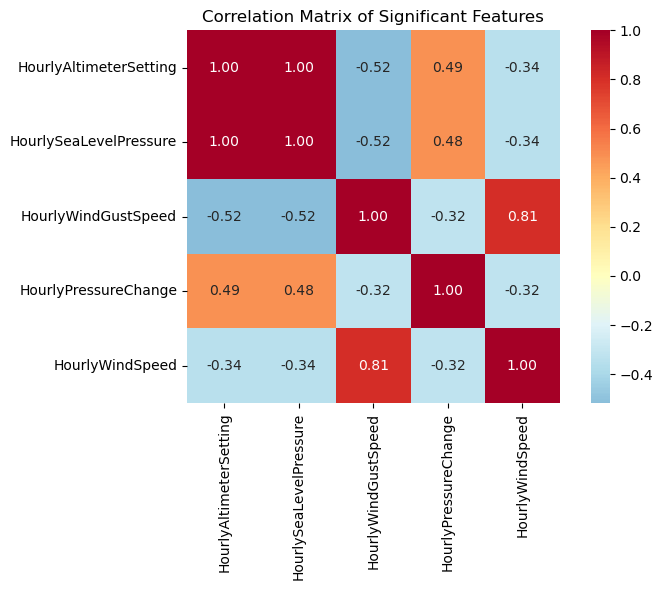

VIF for significant features:
                  Feature           VIF
0                   const  31638.094720
1  HourlyAltimeterSetting   1558.264325
2  HourlySeaLevelPressure   1549.533080
3     HourlyWindGustSpeed      3.594454
5         HourlyWindSpeed      3.077394
4    HourlyPressureChange      1.397679

3. Applying PCA on Significant Features

PCR Results with Significant Features Only:
   n_components      r2     rmse      mae  variance_explained
0             1  0.0238  66.0250  28.5202              0.8787
1             2  0.0569  64.8971  28.2583              0.9535
2             3  0.0542  64.9882  28.4347              0.9916
3             4  0.0938  63.6129  27.6783              0.9999
4             5  0.0998  63.4050  27.7769              1.0000

Optimal configuration:
  Components: 5
  R²: 0.0998
  Variance explained: 1.0000

4. Comparison: All Features vs Significant Features Only

Performance Comparison:
                     Approach  Number of Features  Optimal Componen

In [49]:
print("\n=== FEATURE SELECTION BEFORE DIMENSIONALITY REDUCTION ===")
from sklearn.decomposition import PCA
# 1. Select only statistically significant features (p < 0.05)
print("1. Selecting Statistically Significant Features (p < 0.05)")

significant_features = [
    'HourlyAltimeterSetting',      # p=0.0000
    'HourlySeaLevelPressure',      # p=0.0000
    'HourlyWindGustSpeed',         # p=0.0000
    'HourlyPressureChange',      # p=0.0028
    'HourlyWindSpeed',   
]

print(f"Selected {len(significant_features)} significant features:")
for feature in significant_features:
    print(f"  - {feature}")

# 2. Prepare data with only significant features
X_sig = X[significant_features]
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(
    X_sig, y, test_size=0.2, random_state=42
)

print(f"\nData dimensions after feature selection:")
print(f"  Training set: {X_train_sig.shape}")
print(f"  Test set: {X_test_sig.shape}")

# 3. Check multicollinearity among significant features
print("\n2. Multicollinearity Check for Significant Features:")

# Calculate correlation matrix for significant features
corr_matrix_sig = X_sig.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_sig, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Significant Features')
plt.tight_layout()
plt.show()

# Check VIF for significant features
X_with_const = sm.add_constant(X_sig)
vif_data_sig = pd.DataFrame()
vif_data_sig["Feature"] = X_with_const.columns
vif_data_sig["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                       for i in range(X_with_const.shape[1])]

print("VIF for significant features:")
print(vif_data_sig.sort_values("VIF", ascending=False))

# 4. Apply PCA on significant features
print("\n3. Applying PCA on Significant Features")

# Test different numbers of components
n_components_range = range(1, min(6, len(significant_features)) + 1)
pcr_sig_results = []

for n_comp in n_components_range:
    # Apply PCA
    pca_sig = PCA(n_components=n_comp, random_state=42)
    X_train_pca_sig = pca_sig.fit_transform(X_train_sig)
    X_test_pca_sig = pca_sig.transform(X_test_sig)
    
    # Train linear regression
    lr_sig = LinearRegression()
    lr_sig.fit(X_train_pca_sig, y_train_sig)
    y_pred_sig = lr_sig.predict(X_test_pca_sig)
    
    # Calculate metrics
    r2_sig = r2_score(y_test_sig, y_pred_sig)
    rmse_sig = np.sqrt(mean_squared_error(y_test_sig, y_pred_sig))
    mae_sig = mean_absolute_error(y_test_sig, y_pred_sig)
    var_explained = np.sum(pca_sig.explained_variance_ratio_)
    
    pcr_sig_results.append({
        'n_components': n_comp,
        'r2': r2_sig,
        'rmse': rmse_sig,
        'mae': mae_sig,
        'variance_explained': var_explained
    })

# Create results DataFrame
pcr_sig_df = pd.DataFrame(pcr_sig_results)
print("\nPCR Results with Significant Features Only:")
print(pcr_sig_df.round(4))

# 5. Find optimal number of components
best_sig_idx = pcr_sig_df['r2'].idxmax()
best_sig_comp = pcr_sig_df.loc[best_sig_idx, 'n_components']
best_sig_r2 = pcr_sig_df.loc[best_sig_idx, 'r2']

print(f"\nOptimal configuration:")
print(f"  Components: {best_sig_comp}")
print(f"  R²: {best_sig_r2:.4f}")
print(f"  Variance explained: {pcr_sig_df.loc[best_sig_idx, 'variance_explained']:.4f}")

# 6. Compare with previous approach (all features + PCA)
print("\n4. Comparison: All Features vs Significant Features Only")

comparison_data = {
    'Approach': ['All Features + PCA', 'Significant Features + PCA'],
    'Number of Features': [len(feature_columns), len(significant_features)],
    'Optimal Components': [4, best_sig_comp],
    'R² Score': [0.0100, best_sig_r2],
    'Variance Explained': [0.7185, pcr_sig_df.loc[best_sig_idx, 'variance_explained']],
    'MAE': [26.20, pcr_sig_df.loc[best_sig_idx, 'mae']]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nPerformance Comparison:")
print(comparison_df.round(4))

# 7. Train final model with optimal configuration
print(f"\n5. Training Final Model with {best_sig_comp} Components")

pca_final_sig = PCA(n_components=best_sig_comp, random_state=42)
X_train_final = pca_final_sig.fit_transform(X_train_sig)
X_test_final = pca_final_sig.transform(X_test_sig)

lr_final_sig = LinearRegression()
lr_final_sig.fit(X_train_final, y_train_sig)
y_pred_final = lr_final_sig.predict(X_test_final)

# Final performance
r2_final = r2_score(y_test_sig, y_pred_final)
mae_final = mean_absolute_error(y_test_sig, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test_sig, y_pred_final))

print(f"Final Model Performance:")
print(f"  R²: {r2_final:.4f}")
print(f"  MAE: {mae_final:.2f} minutes")
print(f"  RMSE: {rmse_final:.2f} minutes")

In [51]:
y.mean()

np.float64(14.303398058252426)


=== FEATURE SELECTION BEFORE DIMENSIONALITY REDUCTION ===

Data dimensions after feature selection:
  Training set: (329, 23)
  Test set: (83, 23)

2. Multicollinearity Check for Significant Features:


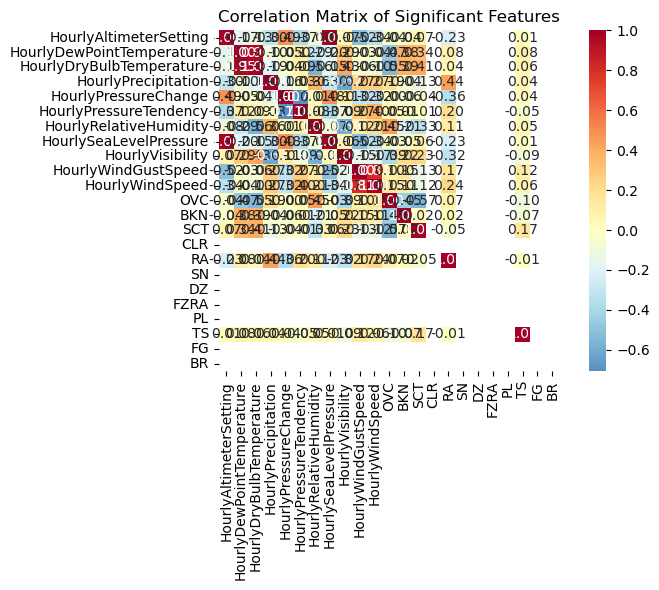

VIF for significant features:
                      Feature           VIF
0                       const  53342.704572
8      HourlySeaLevelPressure   5665.582890
1      HourlyAltimeterSetting   5631.076444
3    HourlyDryBulbTemperature    877.462068
2   HourlyDewPointTemperature    651.038355
7      HourlyRelativeHumidity     90.885179
10        HourlyWindGustSpeed      4.398367
11            HourlyWindSpeed      3.979514
5        HourlyPressureChange      3.143511
6      HourlyPressureTendency      2.847413
9            HourlyVisibility      2.548401
12                        OVC      2.443710
4         HourlyPrecipitation      2.142903
14                        SCT      1.831735
13                        BKN      1.651917
16                         RA      1.516251
21                         TS      1.148515
15                        CLR           NaN
17                         SN           NaN
18                         DZ           NaN
19                       FZRA           NaN
20

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [52]:
print("\n=== FEATURE SELECTION BEFORE DIMENSIONALITY REDUCTION ===")
from sklearn.decomposition import PCA

# 2. Prepare data with only significant features
X_sig = X
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(
    X_sig, y, test_size=0.2, random_state=42
)

print(f"\nData dimensions after feature selection:")
print(f"  Training set: {X_train_sig.shape}")
print(f"  Test set: {X_test_sig.shape}")

# 3. Check multicollinearity among significant features
print("\n2. Multicollinearity Check for Significant Features:")

# Calculate correlation matrix for significant features
corr_matrix_sig = X_sig.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_sig, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Significant Features')
plt.tight_layout()
plt.show()

# Check VIF for significant features
X_with_const = sm.add_constant(X_sig)
vif_data_sig = pd.DataFrame()
vif_data_sig["Feature"] = X_with_const.columns
vif_data_sig["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                       for i in range(X_with_const.shape[1])]

print("VIF for significant features:")
print(vif_data_sig.sort_values("VIF", ascending=False))

# 4. Apply PCA on significant features
print("\n3. Applying PCA on Significant Features")

# Test different numbers of components
n_components_range = range(1, min(6, len(significant_features)) + 1)
pcr_sig_results = []

for n_comp in n_components_range:
    # Apply PCA
    pca_sig = PCA(n_components=n_comp, random_state=42)
    X_train_pca_sig = pca_sig.fit_transform(X_train_sig)
    X_test_pca_sig = pca_sig.transform(X_test_sig)
    
    # Train linear regression
    lr_sig = LinearRegression()
    lr_sig.fit(X_train_pca_sig, y_train_sig)
    y_pred_sig = lr_sig.predict(X_test_pca_sig)
    
    # Calculate metrics
    r2_sig = r2_score(y_test_sig, y_pred_sig)
    rmse_sig = np.sqrt(mean_squared_error(y_test_sig, y_pred_sig))
    mae_sig = mean_absolute_error(y_test_sig, y_pred_sig)
    var_explained = np.sum(pca_sig.explained_variance_ratio_)
    
    pcr_sig_results.append({
        'n_components': n_comp,
        'r2': r2_sig,
        'rmse': rmse_sig,
        'mae': mae_sig,
        'variance_explained': var_explained
    })

# Create results DataFrame
pcr_sig_df = pd.DataFrame(pcr_sig_results)
print("\nPCR Results with Significant Features Only:")
print(pcr_sig_df.round(4))

# 5. Find optimal number of components
best_sig_idx = pcr_sig_df['r2'].idxmax()
best_sig_comp = pcr_sig_df.loc[best_sig_idx, 'n_components']
best_sig_r2 = pcr_sig_df.loc[best_sig_idx, 'r2']

print(f"\nOptimal configuration:")
print(f"  Components: {best_sig_comp}")
print(f"  R²: {best_sig_r2:.4f}")
print(f"  Variance explained: {pcr_sig_df.loc[best_sig_idx, 'variance_explained']:.4f}")

# 6. Compare with previous approach (all features + PCA)
print("\n4. Comparison: All Features vs Significant Features Only")

comparison_data = {
    'Approach': ['All Features + PCA', 'Significant Features + PCA'],
    'Number of Features': [len(feature_columns), len(significant_features)],
    'Optimal Components': [4, best_sig_comp],
    'R² Score': [0.0100, best_sig_r2],
    'Variance Explained': [0.7185, pcr_sig_df.loc[best_sig_idx, 'variance_explained']],
    'MAE': [26.20, pcr_sig_df.loc[best_sig_idx, 'mae']]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nPerformance Comparison:")
print(comparison_df.round(4))

# 7. Train final model with optimal configuration
print(f"\n5. Training Final Model with {best_sig_comp} Components")

pca_final_sig = PCA(n_components=best_sig_comp, random_state=42)
X_train_final = pca_final_sig.fit_transform(X_train_sig)
X_test_final = pca_final_sig.transform(X_test_sig)

lr_final_sig = LinearRegression()
lr_final_sig.fit(X_train_final, y_train_sig)
y_pred_final = lr_final_sig.predict(X_test_final)

# Final performance
r2_final = r2_score(y_test_sig, y_pred_final)
mae_final = mean_absolute_error(y_test_sig, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test_sig, y_pred_final))

print(f"Final Model Performance:")
print(f"  R²: {r2_final:.4f}")
print(f"  MAE: {mae_final:.2f} minutes")
print(f"  RMSE: {rmse_final:.2f} minutes")

